The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

Definition of terrorism:
"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

# Exploratory Data Analysis - Terrorism

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read CSV file
path="globalterrorismdb_0718dist.csv"
df=pd.read_csv(path,encoding = 'ISO-8859-1')

C:\Users\risha\AppData\Local\Temp\ipykernel_3904\2663619934.py:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path,encoding = 'ISO-8859-1')


In [3]:
#Displaying first few rows
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#Checkng data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
#Name of columns
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
#Shape of dataset
df.shape

(181691, 135)

In [7]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','gname':'Group','targtype1_txt':'Target_type','natlty1_txt':'nationality_Target',
                       'weaptype1_txt':'Weapon_type','natlty1_type':'nationality_target'},inplace=True)

In [8]:
df=df[['Year','Month','Day','Country','extended','state','Region','city','AttackType','Killed',
               'Wounded','property','Target','nationality_Target','Group','Target_type','Weapon_type','success']]

In [9]:
df.head()

,Year,Month,Day,Country,extended,state,Region,city,AttackType,Killed,Wounded,property,Target,nationality_Target,Group,Target_type,Weapon_type,success
0,1970,7,2,Dominican Republic,0,NaN,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,0,Julio Guzman,Dominican Republic,MANO-D,Private Citizens & Property,Unknown,1
1,1970,0,0,Mexico,0,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,0,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,Government (Diplomatic),Unknown,1
2,1970,1,0,Philippines,0,Tarlac,Southeast Asia,Unknown,Assassination,1.0,0.0,0,Employee,United States,Unknown,Journalists & Media,Unknown,1
3,1970,1,0,Greece,0,Attica,Western Europe,Athens,Bombing/Explosion,NaN,NaN,1,U.S. Embassy,United States,Unknown,Government (Diplomatic),Explosives,1
4,1970,1,0,Japan,0,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,NaN,1,U.S. Consulate,United States,Unknown,Government (Diplomatic),Incendiary,1


# Univariate Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                181691 non-null  int64  
 1   Month               181691 non-null  int64  
 2   Day                 181691 non-null  int64  
 3   Country             181691 non-null  object 
 4   extended            181691 non-null  int64  
 5   state               181270 non-null  object 
 6   Region              181691 non-null  object 
 7   city                181257 non-null  object 
 8   AttackType          181691 non-null  object 
 9   Killed              171378 non-null  float64
 10  Wounded             165380 non-null  float64
 11  property            181691 non-null  int64  
 12  Target              181055 non-null  object 
 13  nationality_Target  180132 non-null  object 
 14  Group               181691 non-null  object 
 15  Target_type         181691 non-nul

In [11]:
#Checking Null or missing values
df.isna().sum()

Year                      0
Month                     0
Day                       0
Country                   0
extended                  0
state                   421
Region                    0
city                    434
AttackType                0
Killed                10313
Wounded               16311
property                  0
Target                  636
nationality_Target     1559
Group                     0
Target_type               0
Weapon_type               0
success                   0
dtype: int64

In [12]:
df.head()

,Year,Month,Day,Country,extended,state,Region,city,AttackType,Killed,Wounded,property,Target,nationality_Target,Group,Target_type,Weapon_type,success
0,1970,7,2,Dominican Republic,0,NaN,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,0,Julio Guzman,Dominican Republic,MANO-D,Private Citizens & Property,Unknown,1
1,1970,0,0,Mexico,0,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,0,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,Government (Diplomatic),Unknown,1
2,1970,1,0,Philippines,0,Tarlac,Southeast Asia,Unknown,Assassination,1.0,0.0,0,Employee,United States,Unknown,Journalists & Media,Unknown,1
3,1970,1,0,Greece,0,Attica,Western Europe,Athens,Bombing/Explosion,NaN,NaN,1,U.S. Embassy,United States,Unknown,Government (Diplomatic),Explosives,1
4,1970,1,0,Japan,0,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,NaN,1,U.S. Consulate,United States,Unknown,Government (Diplomatic),Incendiary,1


C:\Users\risha\AppData\Local\Temp\ipykernel_3904\3994902221.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


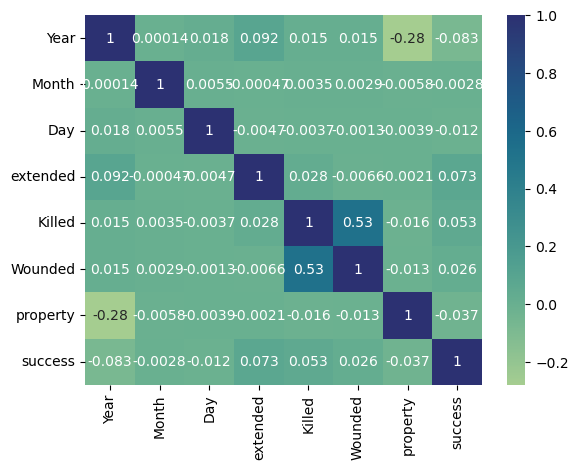

In [13]:
#Checking Correlation between variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="crest")
plt.show()

<Axes: >

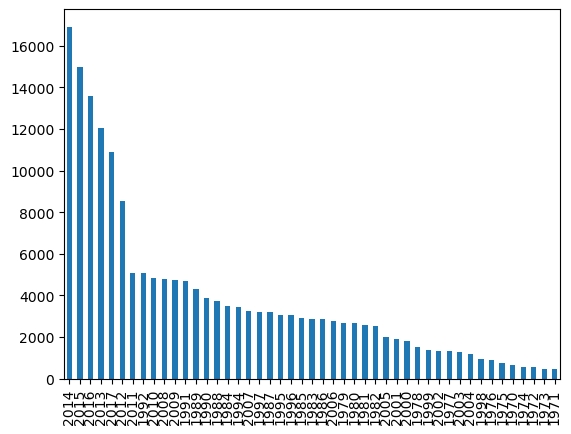

In [14]:
df['Year'].value_counts().plot(kind='bar') 

Top 5 years with most Attack happened from 1971 to 2014
1. 2014
2. 2015 
3. 2016
4. 2013
5. 2017

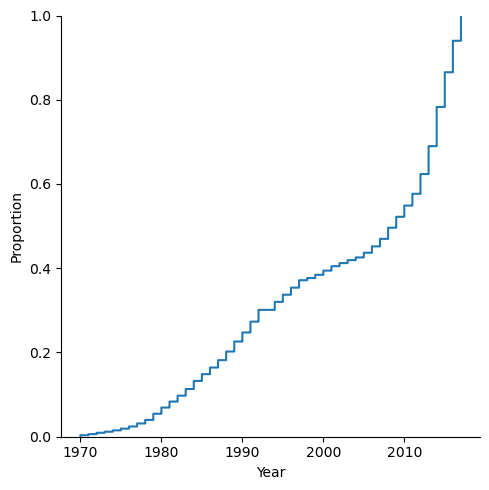

In [15]:
sns.displot(data=df, x="Year", kind="ecdf")


From 1970 to 2014 number of attacks increases

<Axes: >

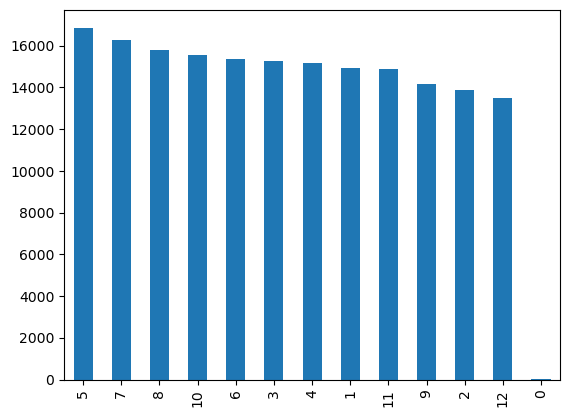

In [16]:
df['Month'].value_counts().plot(kind='bar') 

5th month i.e in May most attacks happened

In [17]:
df['extended'].isna().sum()

0

<Axes: ylabel='extended'>

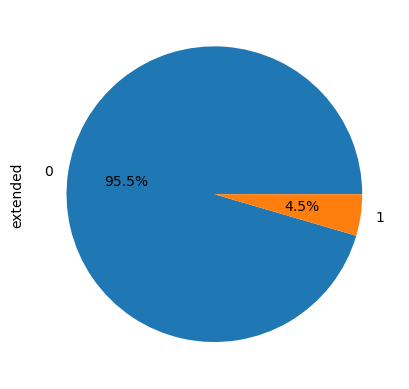

In [18]:
df['extended'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [19]:
df['extended'].value_counts()

0    173452
1      8239
Name: extended, dtype: int64

almost 95% attacks duration is less than 24 hours

<Axes: >

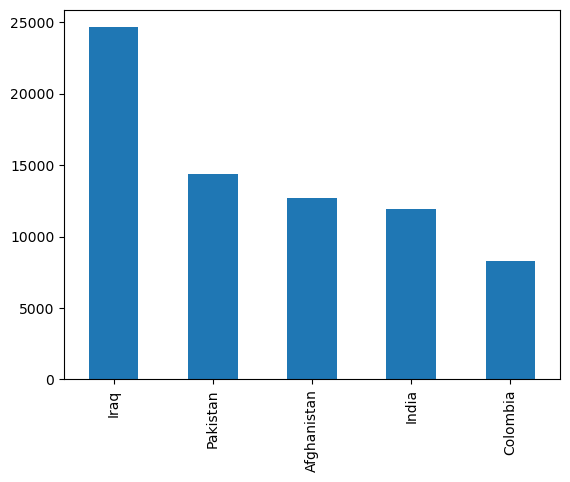

In [20]:
df['Country'].value_counts().head().plot(kind='bar') 

Top 5 countries with most attack happened 
1. Iraq
2. Pakistan
3. Afghanistan
4. India
5. Colombia

In [22]:
#Number of attacks in top 5 countries with most attack happened 
df['Country'].value_counts().head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

<Axes: >

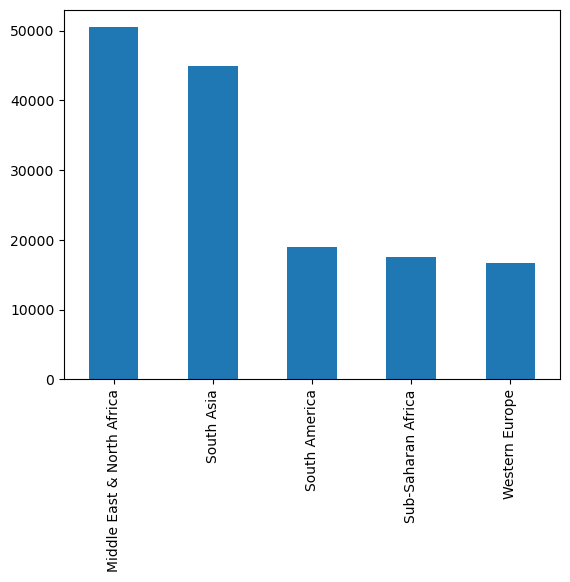

In [23]:
df['Region'].value_counts().head().plot(kind='bar') 


Top 5 regions with most attack happened 
1. Middle East & North Africa
2. South Asia
3. South America
4. Sub-Saharan Africa
5. Western Europe

In [24]:
df['Region'].value_counts().head()

Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: Region, dtype: int64

In [25]:
df['Month'].value_counts().head()

5     16875
7     16268
8     15800
10    15563
6     15359
Name: Month, dtype: int64

In [26]:
df['state'].isna().sum()/len(df['state'])*100

0.23171208260177995

In [27]:
df['state'].value_counts().head()

Baghdad             7645
Northern Ireland    4498
Unknown             4290
Balochistan         3710
Saladin             3411
Name: state, dtype: int64

Most Attacks happened in Baghdad 

In [28]:
df['city'].isna().sum()/len(df['city'])*100

0.23886708752772565

In [29]:
df['city'].value_counts().head()

Unknown    9775
Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Name: city, dtype: int64

<Axes: >

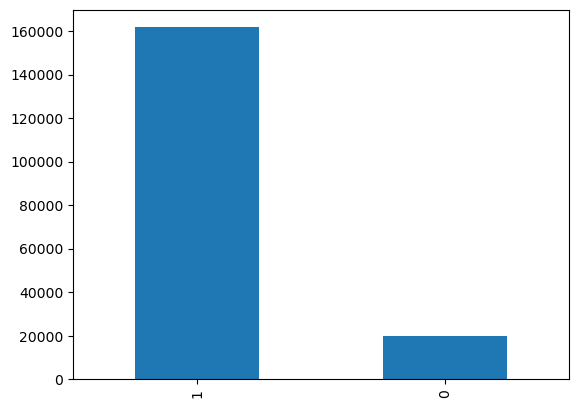

In [30]:
df['success'].value_counts().plot(kind='bar') 

In [31]:
df['success'].value_counts()/len(df['success'])*100

1    88.959827
0    11.040173
Name: success, dtype: float64

88% attacks are successful 

<Axes: >

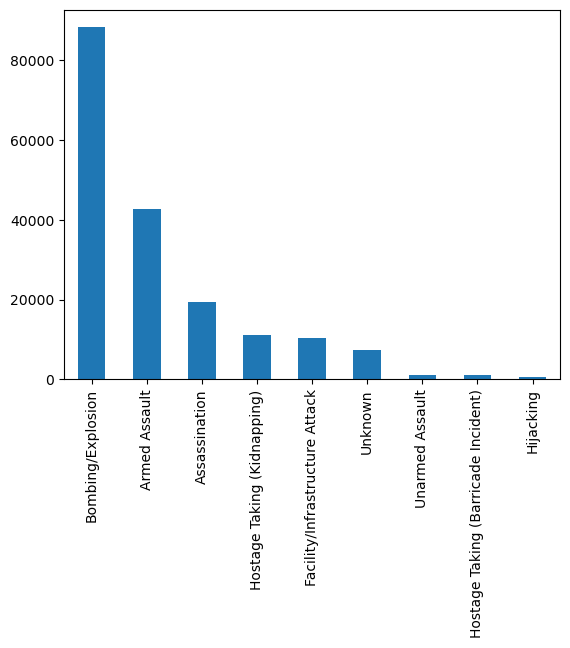

In [32]:
df['AttackType'].value_counts().plot(kind='bar')
#Most attack types are Bombing/explosion

In most attacks Bombing/Explosion is used

<Axes: >

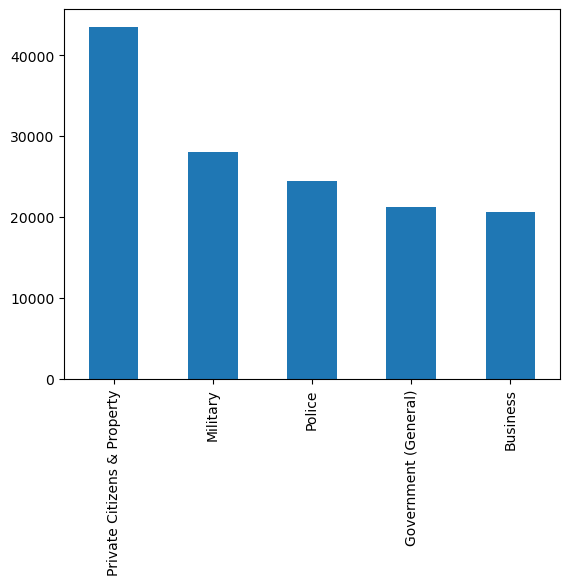

In [33]:
df['Target_type'].value_counts().head().plot(kind='bar')

In most of the attacks target is Private Citizens and Property 

<Axes: >

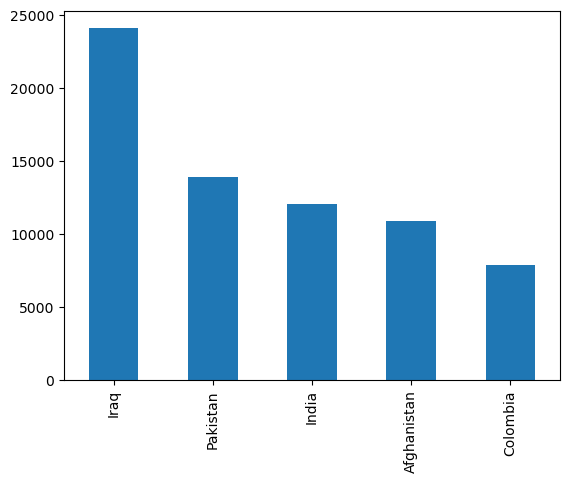

In [34]:
df['nationality_Target'].value_counts().head().plot(kind='bar')

top 5 countryies in which  nationality of the target that was attacked most
1. Iraq
2. Pakistan
3. India
4. Afghanistan
5. Colombia

<Axes: ylabel='nationality_Target'>

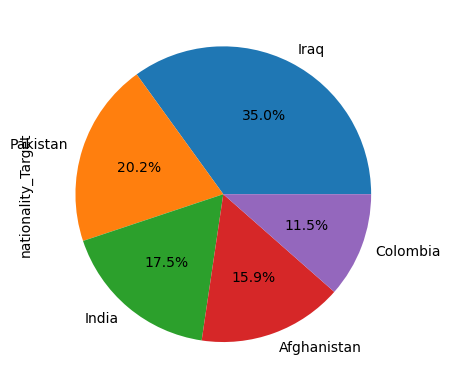

In [35]:
df['nationality_Target'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')

<Axes: >

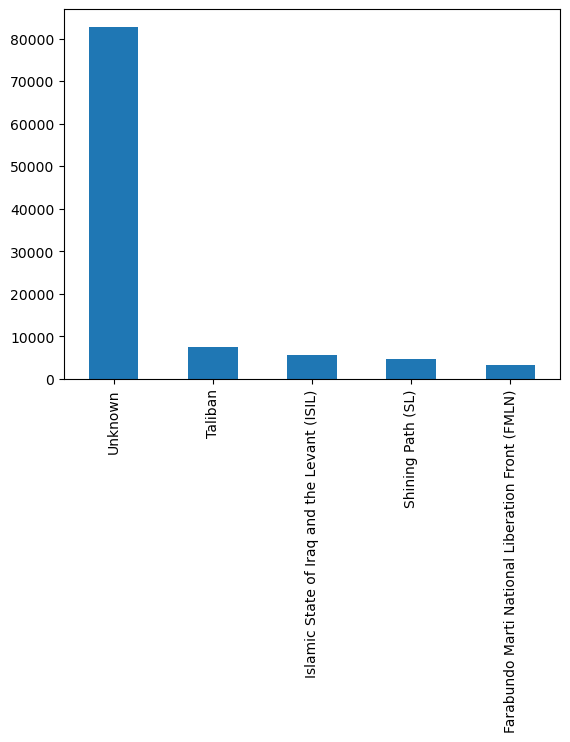

In [36]:
df['Group'].value_counts().head().plot(kind='bar')

Analyzing the given available information of attacks done by perticular group "Taliban" is the group that attack most.

<Axes: >

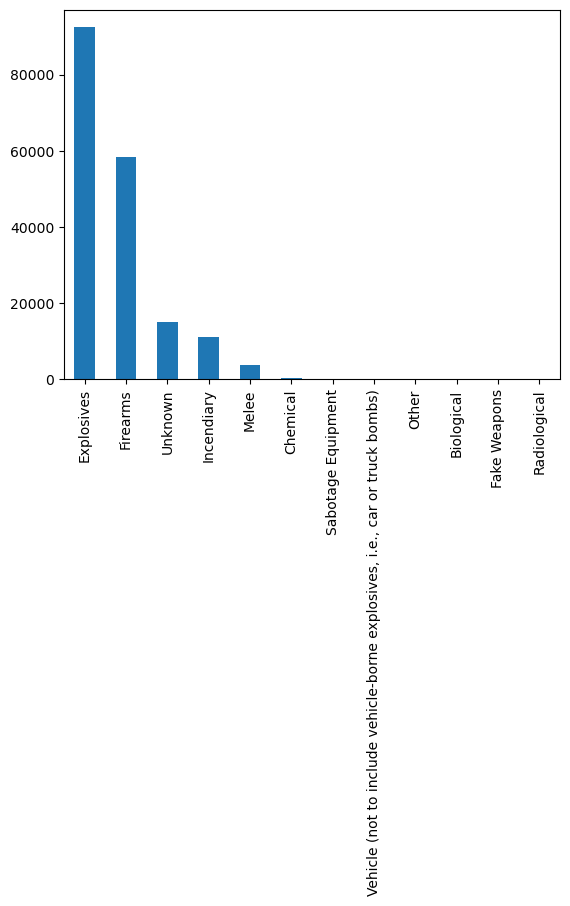

In [37]:
df['Weapon_type'].value_counts().plot(kind='bar')

In [38]:
df['Weapon_type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

Explosives are used in Most attacks

In [39]:
df['Killed'].value_counts().head()

0.0    88149
1.0    36576
2.0    14147
3.0     7738
4.0     4961
Name: Killed, dtype: int64

In [40]:
df['Killed'].isna().sum()

10313

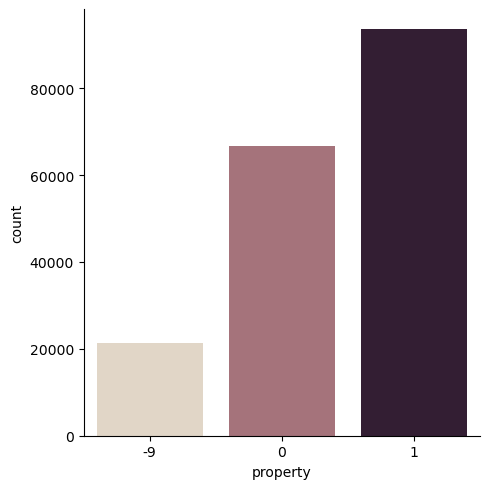

In [41]:
sns.catplot(data=df, x="property", kind="count", palette="ch:.25")

In [42]:
df['property'].value_counts()

 1    93533
 0    66772
-9    21386
Name: property, dtype: int64

In [43]:
df['property'].value_counts()/len(df['property'])*100

 1    51.479160
 0    36.750307
-9    11.770533
Name: property, dtype: float64

# bivariate Analysis

In [44]:
pd.crosstab(df['success'],df['AttackType'])

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
success,,,,,,,,,
0,2324,4697,10725,577,80,8,251,136,1261
1,40345,14615,77530,9779,579,983,10907,879,6015


Most attacks are successful due to Bombing/Explosion 

In [45]:
pd.crosstab(df['success'],df['Weapon_type'])

Weapon_type,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
success,,,,,,,,,,,,
0,20,78,12680,15,4434,663,369,24,12,8,1737,19
1,15,243,79746,18,54090,10472,3286,90,2,133,13420,117


In [46]:
pd.crosstab(df['success'],df['extended'])

extended,0,1
success,,
0,20017,42
1,153435,8197


In [47]:
pd.crosstab(df['success'],df['state'])

state,(Region) of Republican Subordination (Province),(Republic of) Ingushetia,A Coruna,Aargau,Abia,Abkhazia,Abkhazia (Autonomous Region),Abkhazia (Autonomous Republic),Abkhazia (Region),Abra,...,Zugdidi,Zulia,Zurich,khon kaen,phayao,sakon nakhon,samut prakan,saraburi,sulawesi utara,unknown
success,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,2,3,0,0,0,3,...,0,6,4,0,0,0,0,0,1,0
1,1,1,4,4,11,51,1,13,1,36,...,3,11,25,1,1,1,1,1,0,1


In [48]:
successful_attacks = df[df['success'] == 1]

total_attacks_by_year = df.groupby('Year').size().reset_index(name='Total_Attacks_Count')

# Find the year with the most total attacks
year_with_most_attacks = total_attacks_by_year.loc[total_attacks_by_year['Total_Attacks_Count'].idxmax()]

print("Year with the most total attacks:", year_with_most_attacks['Year'])
print("Total number of attacks in that year:", year_with_most_attacks['Total_Attacks_Count'])

# Group data by year and count the number of successful attacks in each year
successful_attacks_by_year = successful_attacks.groupby('Year').size().reset_index(name='Successful_Attacks_Count')

# Find the year with the most successful attacks
most_successful_year = successful_attacks_by_year.loc[successful_attacks_by_year['Successful_Attacks_Count'].idxmax()]



print("Year with the most successful attacks:", most_successful_year['Year'])
print("Number of successful attacks in that year:", most_successful_year['Successful_Attacks_Count'])

Year with the most total attacks: 2014
Total number of attacks in that year: 16903
Year with the most successful attacks: 2014
Number of successful attacks in that year: 15015


In [49]:
year_with_least_attacks = total_attacks_by_year.loc[total_attacks_by_year['Total_Attacks_Count'].idxmin()]
print("Year with the least total attacks:", year_with_least_attacks['Year'])
print("Total number of attacks in that year:", year_with_least_attacks['Total_Attacks_Count'])

Year with the least total attacks: 1971
Total number of attacks in that year: 471


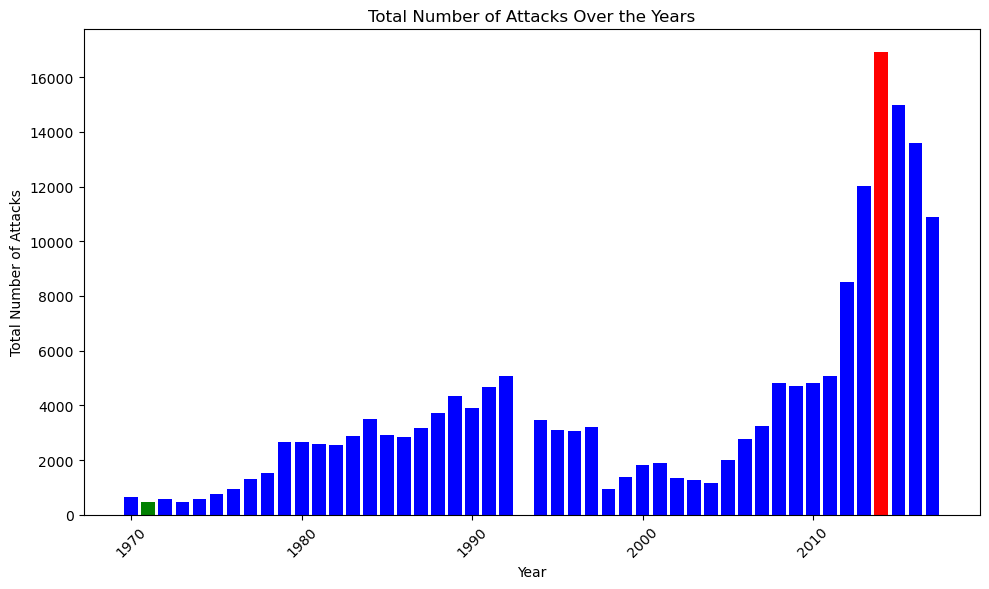

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(total_attacks_by_year['Year'], total_attacks_by_year['Total_Attacks_Count'], color='blue')

# Highlight the year with the most attacks using red color
plt.bar(year_with_most_attacks['Year'], year_with_most_attacks['Total_Attacks_Count'], color='red')

# Highlight the year with the least attacks using green color
plt.bar(year_with_least_attacks['Year'], year_with_least_attacks['Total_Attacks_Count'], color='green')

plt.xlabel('Year')
plt.ylabel('Total Number of Attacks')
plt.title('Total Number of Attacks Over the Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
pd.crosstab(df['property'],df['AttackType'])

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
property,,,,,,,,,
-9,5272,1010,12919,268,30,33,687,48,1119
0,16479,15354,20797,419,401,213,9198,575,3336
1,20918,2948,54539,9669,228,745,1273,392,2821


In [52]:
successful_attacks = df[df['success'] == 1]

total_attacks_by_year = df.groupby('Country').size().reset_index(name='Total_Attacks_Count')

# Find the year with the most total attacks
year_with_most_attacks = total_attacks_by_year.loc[total_attacks_by_year['Total_Attacks_Count'].idxmax()]

print("Year with the most total attacks:", year_with_most_attacks['Country'])
print("Total number of attacks in that year:", year_with_most_attacks['Total_Attacks_Count'])

# Group data by year and count the number of successful attacks in each year
successful_attacks_by_year = successful_attacks.groupby('Country').size().reset_index(name='Successful_Attacks_Count')

# Find the year with the most successful attacks
most_successful_year = successful_attacks_by_year.loc[successful_attacks_by_year['Successful_Attacks_Count'].idxmax()]



print("Year with the most successful attacks:", most_successful_year['Country'])
print("Number of successful attacks in that year:", most_successful_year['Successful_Attacks_Count'])

Year with the most total attacks: Iraq
Total number of attacks in that year: 24636
Year with the most successful attacks: Iraq
Number of successful attacks in that year: 21861


In [53]:
df.head()

,Year,Month,Day,Country,extended,state,Region,city,AttackType,Killed,Wounded,property,Target,nationality_Target,Group,Target_type,Weapon_type,success
0,1970,7,2,Dominican Republic,0,NaN,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,0,Julio Guzman,Dominican Republic,MANO-D,Private Citizens & Property,Unknown,1
1,1970,0,0,Mexico,0,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,0,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,Government (Diplomatic),Unknown,1
2,1970,1,0,Philippines,0,Tarlac,Southeast Asia,Unknown,Assassination,1.0,0.0,0,Employee,United States,Unknown,Journalists & Media,Unknown,1
3,1970,1,0,Greece,0,Attica,Western Europe,Athens,Bombing/Explosion,NaN,NaN,1,U.S. Embassy,United States,Unknown,Government (Diplomatic),Explosives,1
4,1970,1,0,Japan,0,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,NaN,1,U.S. Consulate,United States,Unknown,Government (Diplomatic),Incendiary,1


In [54]:
successful_attacks = df[df['success'] == 1]

# Group data by year and count the total number of attacks in each year
total_attacks_by_year = df.groupby('Group').size().reset_index(name='Total_Attacks_Count')


# Find the second-highest total number of attacks and the corresponding year
second_highest = total_attacks_by_year.nlargest(2, 'Total_Attacks_Count').iloc[1]


print("Year with the second highest total attacks:", second_highest['Group'])
print("Total number of attacks in that year:", second_highest['Total_Attacks_Count'])

Year with the second highest total attacks: Taliban
Total number of attacks in that year: 7478


In [55]:
# Filter data for successful attacks
successful_attacks = df[df['success'] == 1]

# Group successful attacks data by year and count the total number of successful attacks in each year
successful_attacks_by_year = successful_attacks.groupby('Group').size().reset_index(name='Total_Successful_Attacks_Count')

# Find the year with the most successful attacks
year_with_most_successful_attacks = successful_attacks_by_year.loc[successful_attacks_by_year['Total_Successful_Attacks_Count'].idxmax()]

# Find the year with the second-highest total successful attacks and the corresponding count
second_highest_successful = successful_attacks_by_year.nlargest(2, 'Total_Successful_Attacks_Count').iloc[1]

print("Year with the most successful attacks:", year_with_most_successful_attacks['Group'])
print("Total number of successful attacks in that year:", year_with_most_successful_attacks['Total_Successful_Attacks_Count'])
print("Year with the second highest successful attacks:", second_highest_successful['Group'])
print("Total number of successful attacks in that year:", second_highest_successful['Total_Successful_Attacks_Count'])

Year with the most successful attacks: Unknown
Total number of successful attacks in that year: 71748
Year with the second highest successful attacks: Taliban
Total number of successful attacks in that year: 6680


In [56]:
successful_attacks = df[df['success'] == 1]

# Group successful attacks data by year and count the total number of successful attacks in each year
successful_attacks_by_year = successful_attacks.groupby('Weapon_type').size().reset_index(name='Total_Successful_Attacks_Count')

# Find the year with the most successful attacks
year_with_most_successful_attacks = successful_attacks_by_year.loc[successful_attacks_by_year['Total_Successful_Attacks_Count'].idxmax()]


print("Year with the most successful attacks:", year_with_most_successful_attacks['Weapon_type'])
print("Total number of successful attacks in that year:", year_with_most_successful_attacks['Total_Successful_Attacks_Count'])

Year with the most successful attacks: Explosives
Total number of successful attacks in that year: 79746


In [57]:
attacks_by_country_region = df.groupby(['Country', 'Region']).size().reset_index(name='Total_Attacks_Count')

# Find the row with the maximum total number of attacks
max_attacks_row = attacks_by_country_region.loc[attacks_by_country_region['Total_Attacks_Count'].idxmax()]
min_attacks_row = attacks_by_country_region.loc[attacks_by_country_region['Total_Attacks_Count'].idxmin()]

print("Country with the maximum attacks:", max_attacks_row['Country'])
print("Region with the maximum attacks:", max_attacks_row['Region'])
print("Region with the minimum attacks:", min_attacks_row['Region'])
print("Total number of attacks in that region:", max_attacks_row['Total_Attacks_Count'])

Country with the maximum attacks: Iraq
Region with the maximum attacks: Middle East & North Africa
Region with the minimum attacks: Western Europe
Total number of attacks in that region: 24636
